Se ha utilizado un cuadernillo para google colab, el cual utiliza lenguaje phyton y recursos computacionales en la nube. por las demandas del proyecto se contrato un servisio de paga que amplia las capacidades de procesamiento.

se instala el framework ultralytics para disponer y acceder a la funcionalidad del modelo preentrenado yolo8, en sus capacidades de segmentacion semantica

In [1]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


Se va ha descargar el modelo preentrenado yolov8m-seg.pt

In [ ]:
# !yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/bus.jpg'

integramos nuestro google drive a este computador para acceder a informacion almacenada en el mismo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


instalamos librerias roboflow, que nos permitiran acceder a nuestro dataset (imagenes,marcaciones en formato yolo8)

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="AmvwAaAnxUgw9B1Q6s4N")
# project = rf.workspace("jhenny-miranda").project("quirpinchaca")
# dataset = project.version(29).download("yolov8")


Importamos el objeto yolo dr la libreria ultralytics para utilizar el modelo para el entrenamiento con datos especificos (residuos solidos en las orillas del rio), porque el modelo no reconoce este tipo de objetos en estas circunstancias.
importamos las clase display e Image de la libreria de IPhyton.display para visualizar las fotografias cuando asi se requieran

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

creamos object model de la clase YOLO que utiliza un modelo preentrenado yolov8m-seg.pt

In [ ]:
# model = YOLO(f'/content/yolov8n-seg.pt')
# model = YOLO(f'/content/drive/MyDrive/JMB/checkpoints/best_13102023_l.pt')

# model = YOLO(f'/content/drive/MyDrive/JMB/dataset/runs/segment/train/segment/train/weights/epoch4.pt')

# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
# %cd /content/drive/MyDrive/JMB/dataset

In [ ]:
# !ls

In [ ]:
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train'})

In [ ]:
# !yolo task=detect mode=train model=yolov8n-seg.pt data= /content/dataset-29/data.yaml epochs=2 imgsz=640 plots=True save_period=1
!yolo task=detect mode=train model=yolov8m-seg.pt data= /content/drive/MyDrive/YOLOv8/dataset/data.yaml epochs=40 imgsz=640 plots=True save_period=1
# !yolo task=detect mode=train resume model=/content/drive/MyDrive/JMB/checkpoints/last_25102023_0251_l.pt data= /content/drive/MyDrive/JMB/dataset/data.yaml epochs=40 imgsz=640 plots=True save_period=1

100% 52.4M/52.4M [00:00<00:00, 232MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/YOLOv8/dataset/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

In [ ]:
!ls /content/drive/MyDrive/YOLOv8/dataset/runs/segment/train

segment


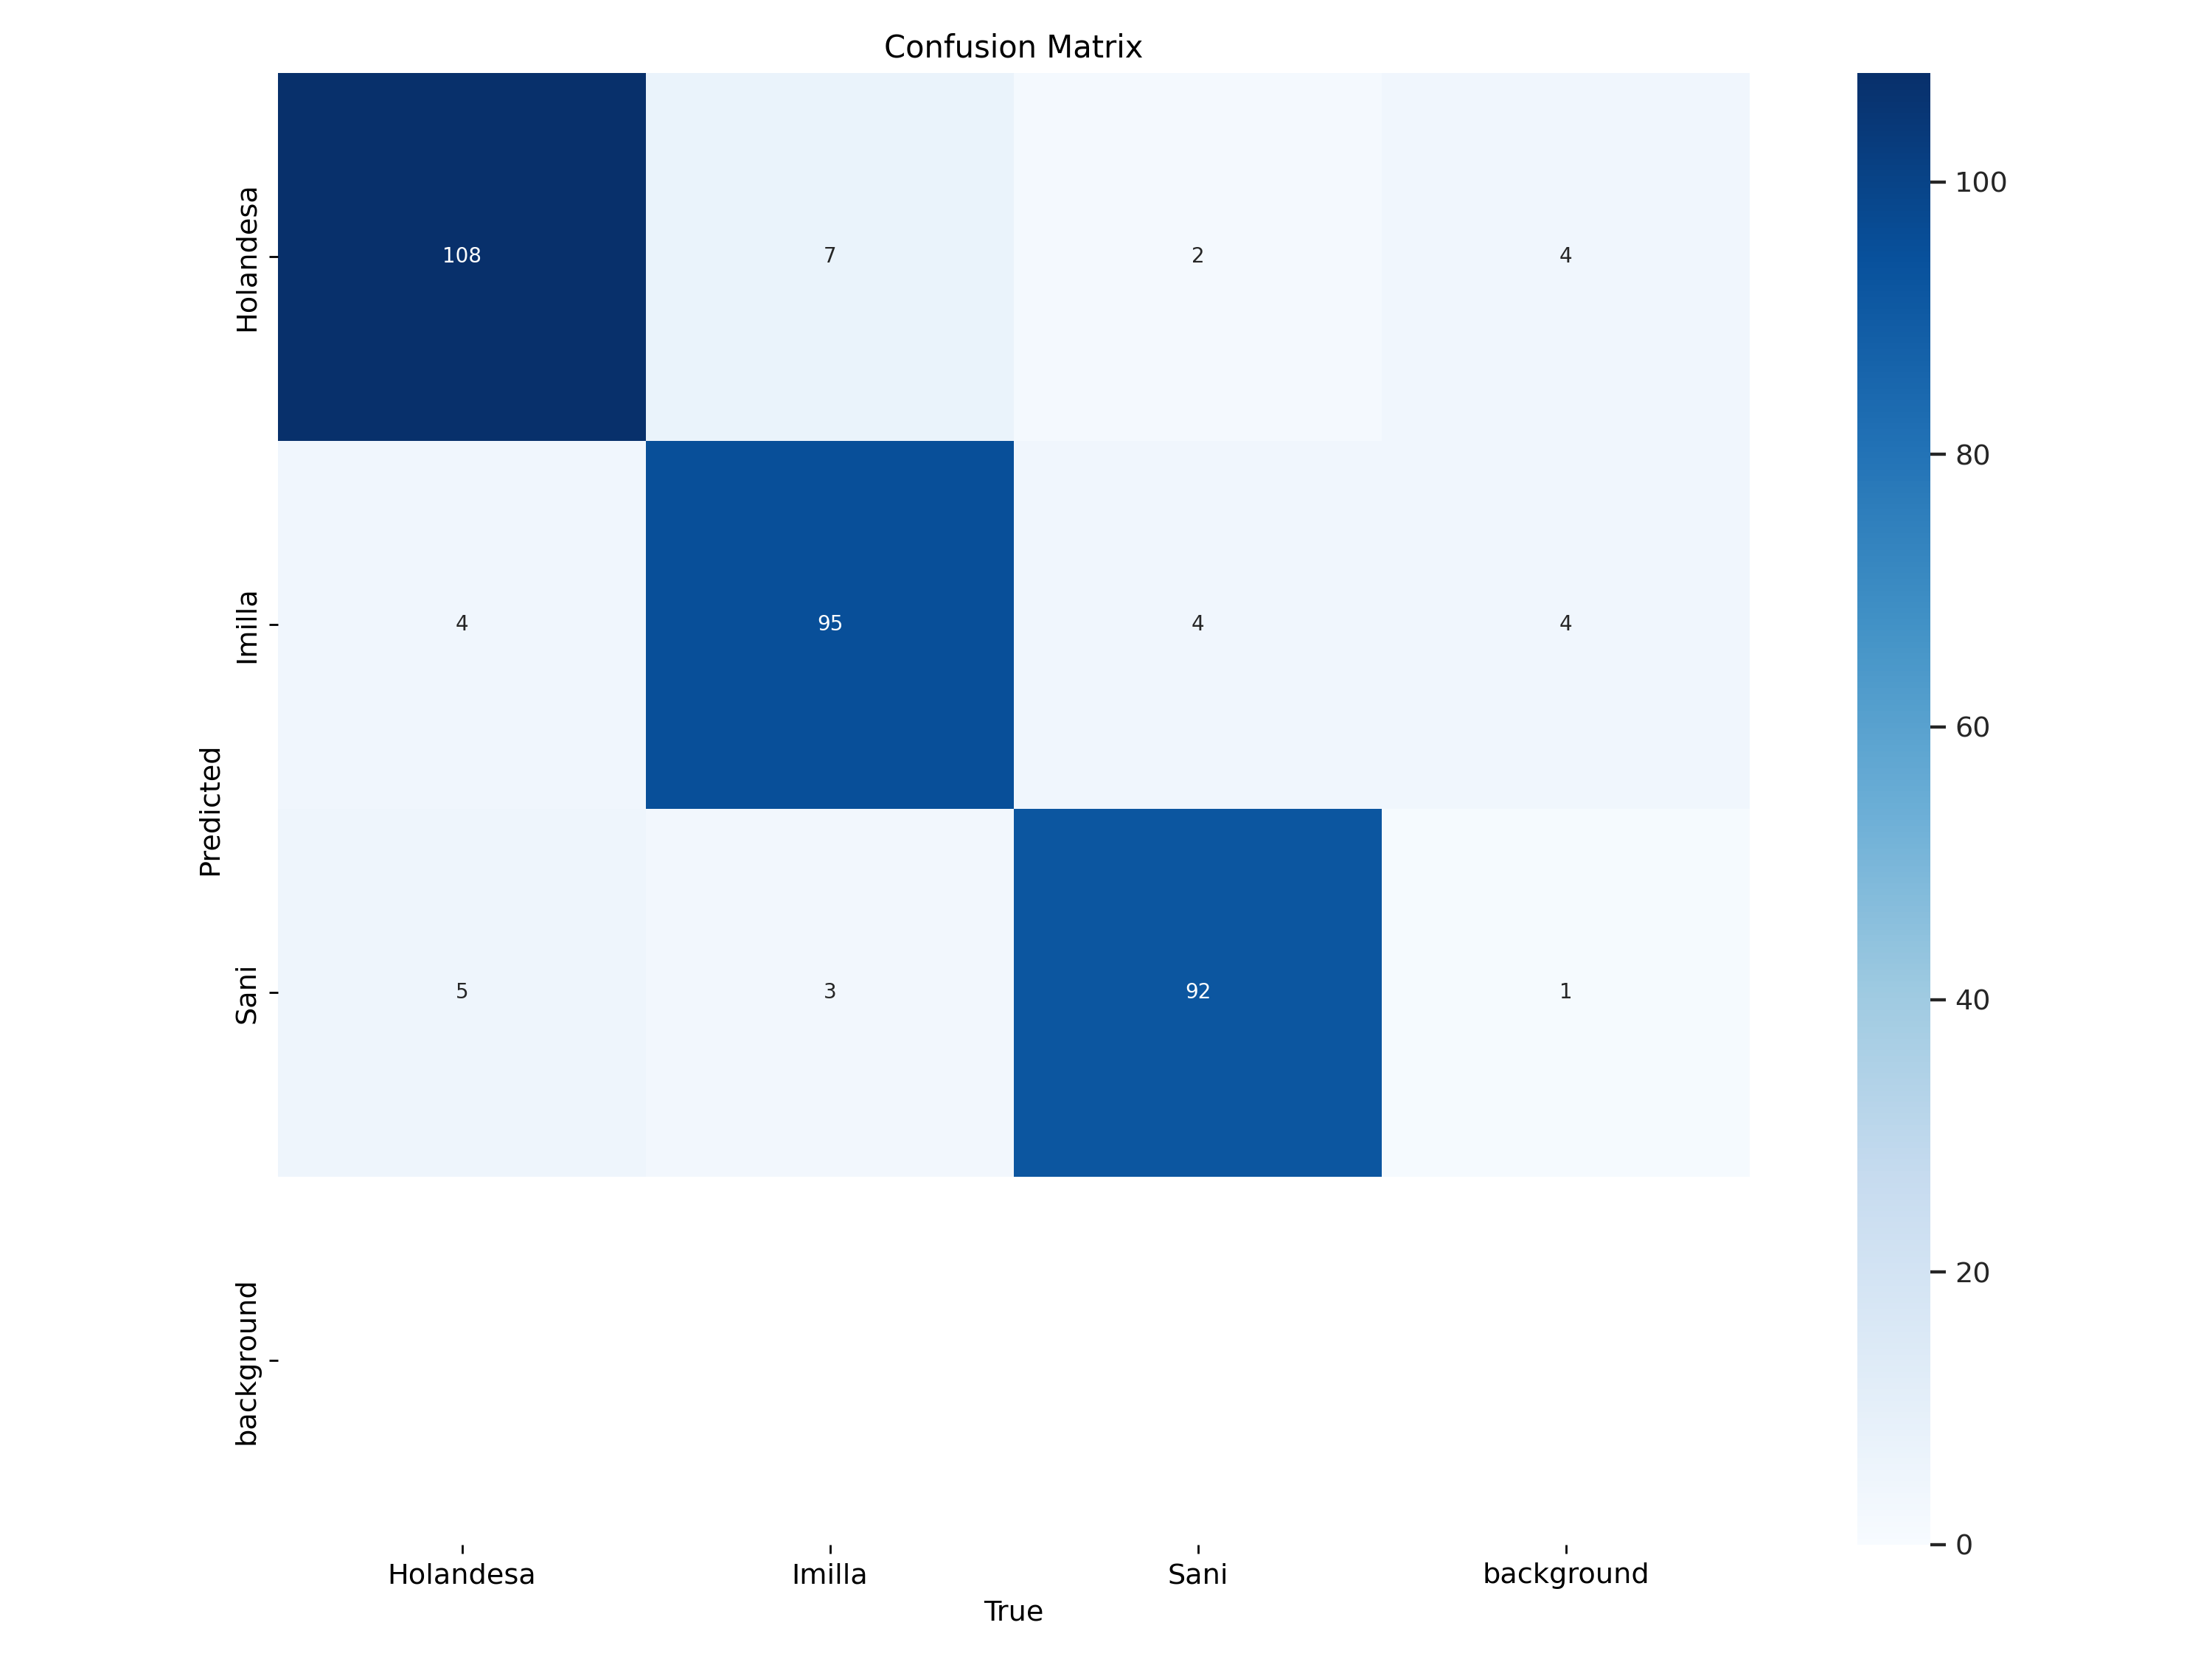

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train/confusion_matrix.png', width=600)

In [ ]:
!ls /content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train

args.yaml					    MaskF1_curve.png	 train_batch6121.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch6122.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1699623566.4e794da0a705.1007.0  train_batch1.jpg	 val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	 weights
labels.jpg					    train_batch6120.jpg


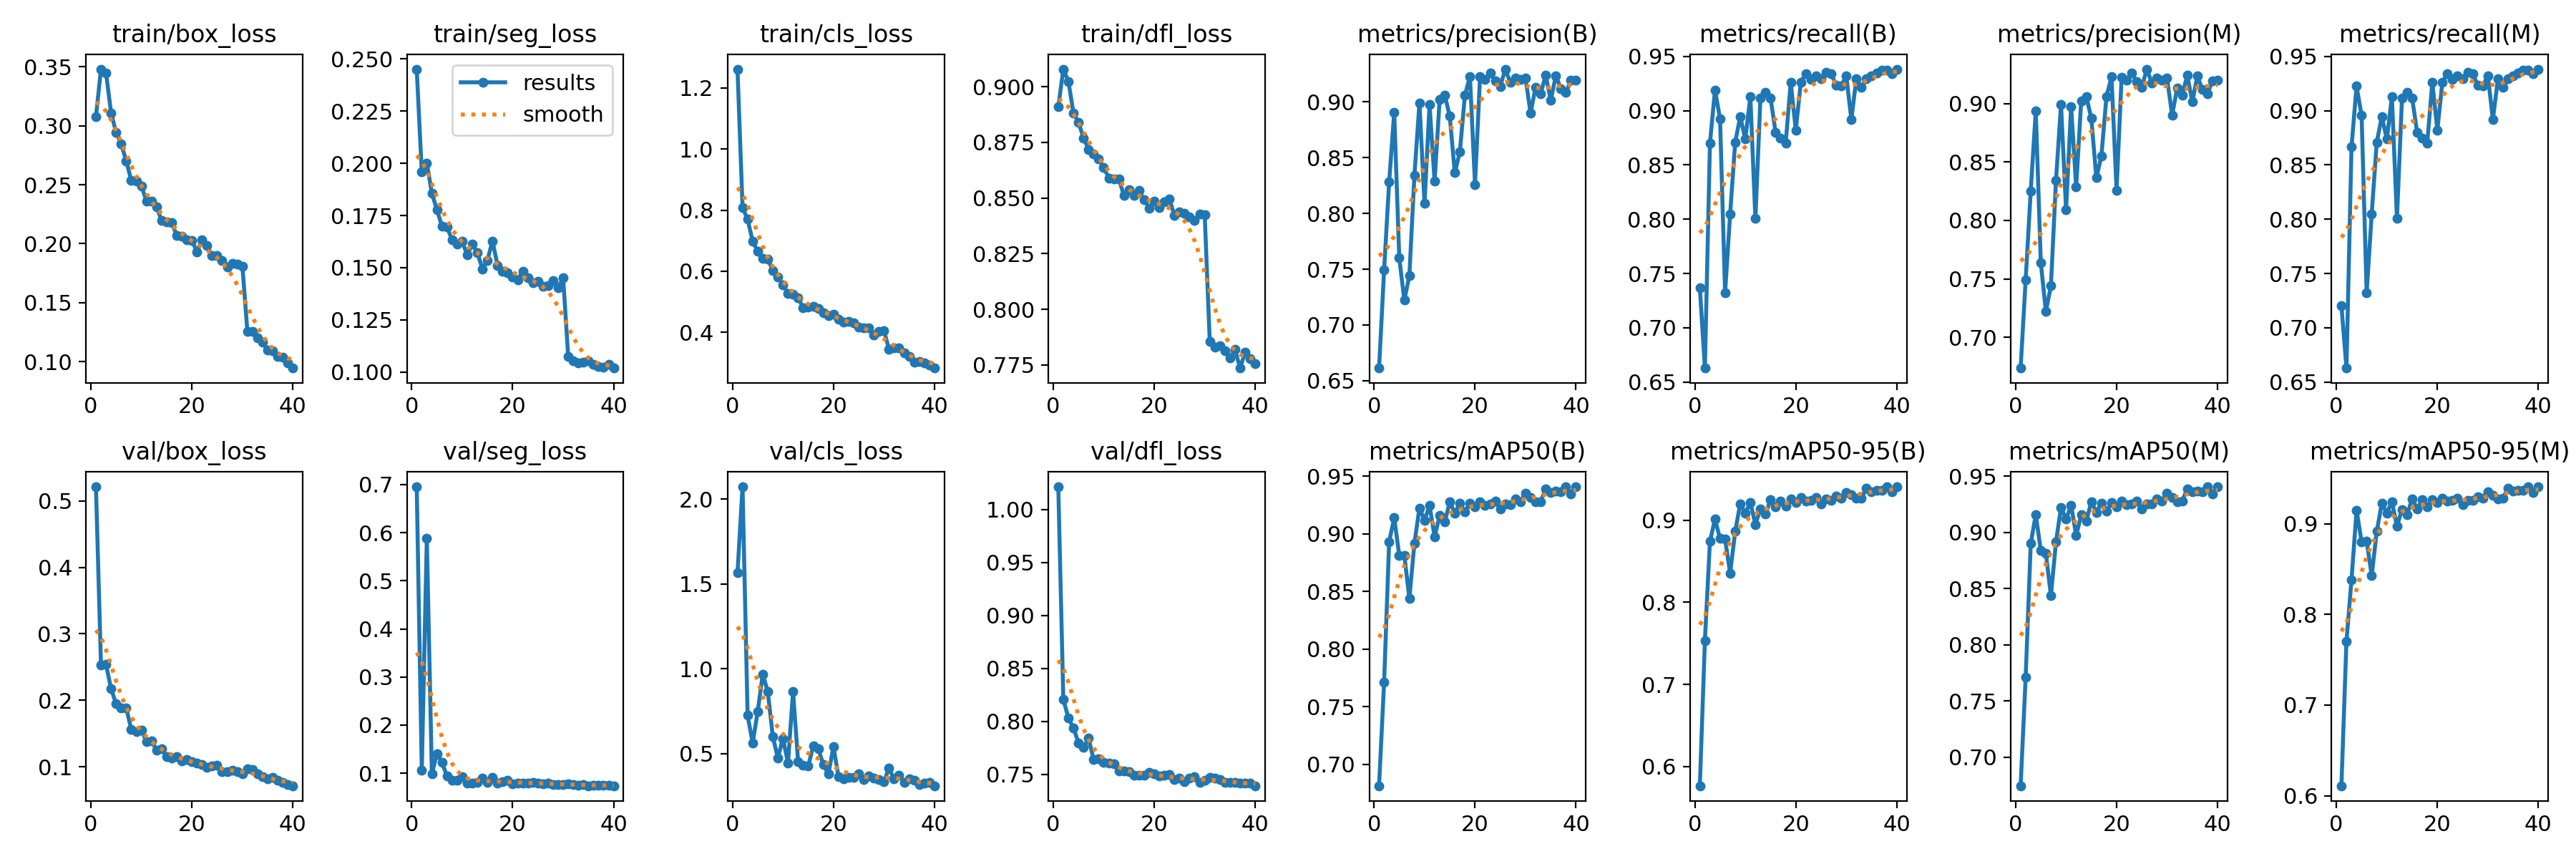

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train/results.png', width=800)

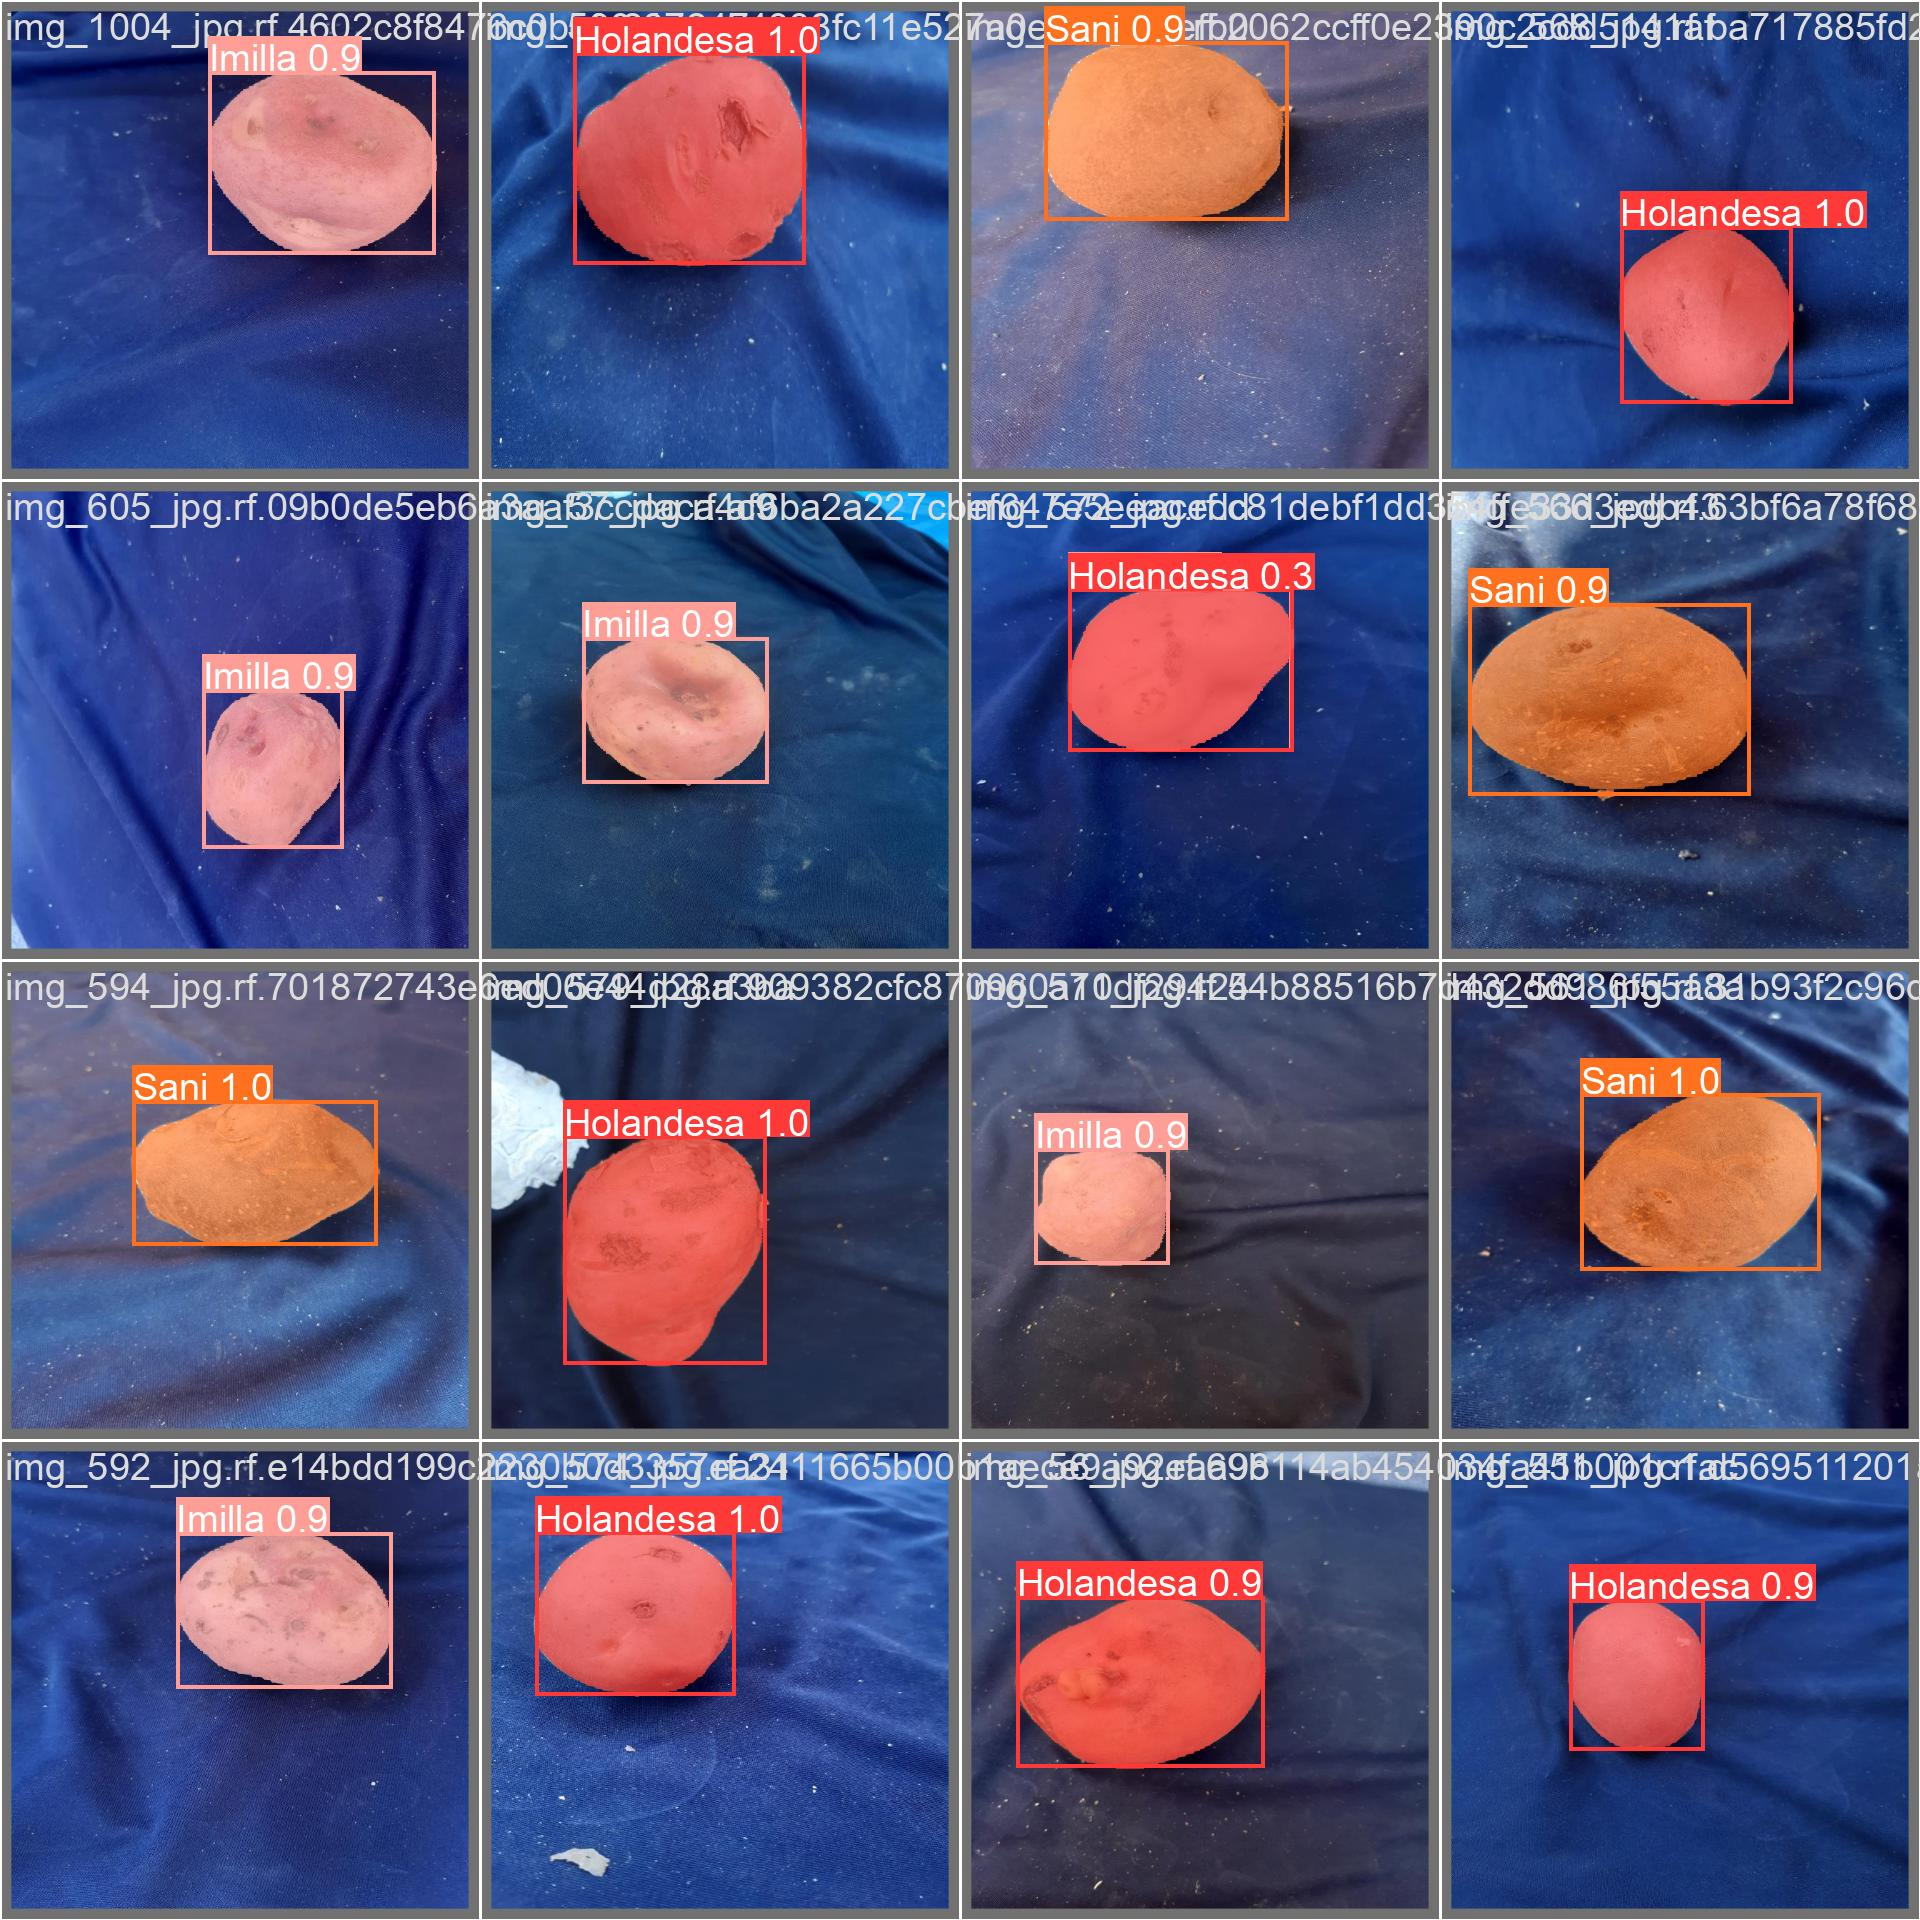

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train/weights/best.pt data=/content/drive/MyDrive/YOLOv8/dataset/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/dataset/valid/labels.cache... 309 images, 0 backgrounds, 0 corrupt: 100% 309/309 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/YOLOv8/dataset/valid/images/img_357_jpg.rf.f3e6a3eefcf1eab3e8e2b892f3dfece8.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 20/20 [00:13<00:00,  1.48it/s]
                   all        309        320      0.908      0.937      0.941      0.941      0.908      0.937      0.941      0.941
             Holandesa        309        117      0.898      0.932      0.945      0.945   

In [4]:
from google.colab.patches import cv2_imshow
import cv2
from IPython.display import display, Image
from pathlib import Path
from ultralytics import YOLO

# Ruta de la imagen
img_path = "/content/drive/MyDrive/YOLOv8/20231109_111553.jpg"

# Mostrar la imagen en una ventana
img = cv2.imread(img_path)
display(Image(filename=img_path, width=400))

# Inicializar el modelo YOLO
model = YOLO("/content/drive/MyDrive/YOLOv8/dataset/runs/segment/train/segment/train/weights/best.pt")

# Realizar la predicción
pred = model.predict(img)[0]

# Dibujar las cajas delimitadoras y etiquetas en la imagen
img_pred = pred.plot()

# Obtener la máscara de segmentación (si está disponible)
if 'segmentation' in pred.names:
    segmentation_mask = pred['segmentation'].numpy()

    # Aplicar la máscara a la imagen
    img_pred = cv2.addWeighted(img_pred, 0.7, segmentation_mask, 0.3, 0)

# Redimensionar la imagen resultante a 400x400
img_pred_resized = cv2.resize(img_pred, (400, 400))

# Mostrar la imagen resultante redimensionada
cv2_imshow(img_pred_resized)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/dataset
!ls

/content/drive/MyDrive/YOLOv8/dataset
data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid
